# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

## Business Understanding

The purporse of this project is to:

1. analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. 
2. use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. 
3. apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company
4. use a model to predict which individuals are most likely to convert into becoming customers for the company. 

In [2]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

## Part 0: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

### Data Understanding

In [6]:
# load in the data
azdias = pd.read_csv('azdias.csv', sep=';')
azdias_backup = azdias

/home/kuhelee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
azdias1 = azdias.drop(azdias.columns[[0]], axis=1)

In [8]:
azdias1.shape

(891221, 366)

In [10]:
print("Demographic data dimension: ",azdias.shape)
azdias.describe()

Demographic data dimension:  (891221, 367)


,Unnamed: 0,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,891221.000000,8.912210e+05,891221.000000,817722.000000,817722.000000,81058.000000,29499.000000,6170.000000,1205.000000,628274.000000,...,770025.000000,815304.000000,815304.000000,815304.000000,783619.000000,817722.000000,798073.000000,891221.000000,891221.000000,891221.000000
mean,445610.000000,6.372630e+05,-0.358435,4.421928,10.864126,11.745392,13.402658,14.476013,15.089627,13.700717,...,2.417322,6.001214,7.532130,5.945972,3.933406,7.908791,4.052836,3.362438,1.522098,2.777398
std,257273.486465,2.572735e+05,1.198724,3.638805,7.639683,4.097660,3.243300,2.712427,2.452932,5.079849,...,1.166572,2.856091,3.247789,2.771464,1.964701,1.923137,1.949539,1.352704,0.499512,1.068775
min,0.000000,1.916530e+05,-1.000000,1.000000,0.000000,2.000000,2.000000,4.000000,7.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,222805.000000,4.144580e+05,-1.000000,1.000000,0.000000,8.000000,11.000000,13.000000,14.000000,11.000000,...,2.000000,3.000000,5.000000,4.000000,2.000000,8.000000,3.000000,3.000000,1.000000,2.000000
50%,445610.000000,6.372630e+05,-1.000000,3.000000,13.000000,12.000000,14.000000,15.000000,15.000000,14.000000,...,2.000000,6.000000,8.000000,6.000000,4.000000,9.000000,3.000000,3.000000,2.000000,3.000000
75%,668415.000000,8.600680e+05,-1.000000,9.000000,17.000000,15.000000,16.000000,17.000000,17.000000,17.000000,...,3.000000,9.000000,10.000000,8.000000,6.000000,9.000000,5.000000,4.000000,2.000000,4.000000
max,891220.000000,1.082873e+06,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,...,4.000000,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,2.000000,9.000000


In [11]:
azdias = azdias1

## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

In [12]:
# Load in the feature summary file.
feat_info = pd.read_csv('data/AZDIAS_Feature_Summary.csv', sep=';')

In [13]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [14]:
feat_info.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
attribute             85 non-null object
information_level     85 non-null object
type                  85 non-null object
missing_or_unknown    85 non-null object
dtypes: object(4)
memory usage: 2.7+ KB


In [15]:
# Set attribute as index for `feat_info` dataframe
feat_info.set_index('attribute', inplace=True)
# Delete columns found in the features not found in the general population dataframe
feat_extra = np.setdiff1d(feat_info.index, azdias.columns, assume_unique=True)
feat_info.drop(feat_extra, inplace=True)
feat_info.shape

(85, 3)

In [16]:
# Check remaining missing columns in the feature summary file
feat_missing = np.setdiff1d(azdias.columns, feat_info.index, assume_unique=True)
print('There are {} missing features.'.format(len(feat_missing)))
feat_missing

There are 281 missing features.


array(['LNR', 'AKT_DAT_KL', 'ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3',
       'ALTER_KIND4', 'ALTERSKATEGORIE_FEIN', 'ANZ_KINDER',
       'ANZ_STATISTISCHE_HAUSHALTE', 'CJT_KATALOGNUTZER', 'CJT_TYP_1',
       'CJT_TYP_2', 'CJT_TYP_3', 'CJT_TYP_4', 'CJT_TYP_5', 'CJT_TYP_6',
       'D19_BANKEN_ANZ_12', 'D19_BANKEN_ANZ_24', 'D19_BANKEN_DATUM',
       'D19_BANKEN_DIREKT', 'D19_BANKEN_GROSS', 'D19_BANKEN_LOKAL',
       'D19_BANKEN_OFFLINE_DATUM', 'D19_BANKEN_ONLINE_DATUM',
       'D19_BANKEN_ONLINE_QUOTE_12', 'D19_BANKEN_REST',
       'D19_BEKLEIDUNG_GEH', 'D19_BEKLEIDUNG_REST', 'D19_BILDUNG',
       'D19_BIO_OEKO', 'D19_BUCH_CD', 'D19_DIGIT_SERV',
       'D19_DROGERIEARTIKEL', 'D19_ENERGIE', 'D19_FREIZEIT', 'D19_GARTEN',
       'D19_GESAMT_ANZ_12', 'D19_GESAMT_ANZ_24', 'D19_GESAMT_DATUM',
       'D19_GESAMT_OFFLINE_DATUM', 'D19_GESAMT_ONLINE_DATUM',
       'D19_GESAMT_ONLINE_QUOTE_12', 'D19_HANDWERK', 'D19_HAUS_DEKO',
       'D19_KINDERARTIKEL', 'D19_KONSUMTYP', 'D19_KONSUMTYP_MAX',
    

In [17]:
# Create new dataframe of missing features
feat_missing = pd.DataFrame(feat_missing, columns=['attribute'])
feat_missing['information_level'] = np.NaN
feat_missing['type'] = np.NaN
feat_missing['missing_or_unknown'] = '[]'
feat_missing.set_index('attribute', inplace=True)
print('There are {} rows and {} columns.'.format(feat_missing.shape[0], feat_missing.shape[1]))
feat_missing.head()

There are 281 rows and 3 columns.


,information_level,type,missing_or_unknown
attribute,,,
LNR,NaN,NaN,[]
AKT_DAT_KL,NaN,NaN,[]
ALTER_KIND1,NaN,NaN,[]
ALTER_KIND2,NaN,NaN,[]
ALTER_KIND3,NaN,NaN,[]


In [18]:
azdias.isnull().sum()

LNR                                0
AGER_TYP                           0
AKT_DAT_KL                     73499
ALTER_HH                       73499
ALTER_KIND1                   810163
ALTER_KIND2                   861722
ALTER_KIND3                   885051
ALTER_KIND4                   890016
ALTERSKATEGORIE_FEIN          262947
ANZ_HAUSHALTE_AKTIV            93148
ANZ_HH_TITEL                   97008
ANZ_KINDER                     73499
ANZ_PERSONEN                   73499
ANZ_STATISTISCHE_HAUSHALTE     93148
ANZ_TITEL                      73499
ARBEIT                         97216
BALLRAUM                       93740
CAMEO_DEU_2015                 98979
CAMEO_DEUG_2015                98979
CAMEO_INTL_2015                98979
CJT_GESAMTTYP                   4854
CJT_KATALOGNUTZER               4854
CJT_TYP_1                       4854
CJT_TYP_2                       4854
CJT_TYP_3                       4854
CJT_TYP_4                       4854
CJT_TYP_5                       4854
C

In [19]:
# Add dataframe of missing features to the original features information dataframe
feat_info = feat_info.append(feat_missing)
print('There are {} rows and {} columns.'.format(feat_info.shape[0], feat_info.shape[1]))
feat_info.head()

There are 366 rows and 3 columns.


,information_level,type,missing_or_unknown
attribute,,,
AGER_TYP,person,categorical,"[-1,0]"
ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
ANREDE_KZ,person,categorical,"[-1,0]"
CJT_GESAMTTYP,person,categorical,[0]
FINANZ_MINIMALIST,person,ordinal,[-1]


In [20]:
# This should be null
np.setdiff1d(azdias.columns, feat_info.index, assume_unique=True)

array([], dtype=object)

In [21]:
feat_info.missing_or_unknown.value_counts()

[]          291
[-1]         26
[-1,9]       17
[-1,0]       16
[0]          12
[-1,0,9]      1
[-1,X]        1
[XX]          1
[-1,XX]       1
Name: missing_or_unknown, dtype: int64

In [22]:
from ast import literal_eval

In [23]:
#Prepare array of strings containing X for parsing 
feat_info.missing_or_unknown = feat_info.missing_or_unknown.replace('[-1,XX]', "[-1,'XX']")
feat_info.missing_or_unknown = feat_info.missing_or_unknown.replace('[XX]', "['XX']")
feat_info.missing_or_unknown = feat_info.missing_or_unknown.replace('[-1,X]', "[-1,'X']")

# Convert string representation to a list
feat_info.missing_or_unknown = feat_info.missing_or_unknown.apply(literal_eval)

In [24]:
# Check for conversion
feat_info['missing_or_unknown'].head()

attribute
AGER_TYP                   [-1, 0]
ALTERSKATEGORIE_GROB    [-1, 0, 9]
ANREDE_KZ                  [-1, 0]
CJT_GESAMTTYP                  [0]
FINANZ_MINIMALIST             [-1]
Name: missing_or_unknown, dtype: object

In [25]:
# convert missing value codes to NaNs
col_index =0
for column in azdias:
    col_index +=1
    mask = azdias[column].isin(feat_info.at[column, 'missing_or_unknown'])
    azdias.at[mask, column] = np.NaN
    print(col_index, ": ",column," converting missing to NaN completed")

1 :  LNR  converting missing to NaN completed
2 :  AGER_TYP  converting missing to NaN completed
3 :  AKT_DAT_KL  converting missing to NaN completed
4 :  ALTER_HH  converting missing to NaN completed
5 :  ALTER_KIND1  converting missing to NaN completed
6 :  ALTER_KIND2  converting missing to NaN completed
7 :  ALTER_KIND3  converting missing to NaN completed
8 :  ALTER_KIND4  converting missing to NaN completed
9 :  ALTERSKATEGORIE_FEIN  converting missing to NaN completed
10 :  ANZ_HAUSHALTE_AKTIV  converting missing to NaN completed
11 :  ANZ_HH_TITEL  converting missing to NaN completed
12 :  ANZ_KINDER  converting missing to NaN completed
13 :  ANZ_PERSONEN  converting missing to NaN completed
14 :  ANZ_STATISTISCHE_HAUSHALTE  converting missing to NaN completed
15 :  ANZ_TITEL  converting missing to NaN completed
16 :  ARBEIT  converting missing to NaN completed
17 :  BALLRAUM  converting missing to NaN completed
18 :  CAMEO_DEU_2015  converting missing to NaN completed
19 :  CA

152 :  KBA05_KW1  converting missing to NaN completed
153 :  KBA05_KW2  converting missing to NaN completed
154 :  KBA05_KW3  converting missing to NaN completed
155 :  KBA05_MAXAH  converting missing to NaN completed
156 :  KBA05_MAXBJ  converting missing to NaN completed
157 :  KBA05_MAXHERST  converting missing to NaN completed
158 :  KBA05_MAXSEG  converting missing to NaN completed
159 :  KBA05_MAXVORB  converting missing to NaN completed
160 :  KBA05_MOD1  converting missing to NaN completed
161 :  KBA05_MOD2  converting missing to NaN completed
162 :  KBA05_MOD3  converting missing to NaN completed
163 :  KBA05_MOD4  converting missing to NaN completed
164 :  KBA05_MOD8  converting missing to NaN completed
165 :  KBA05_MODTEMP  converting missing to NaN completed
166 :  KBA05_MOTOR  converting missing to NaN completed
167 :  KBA05_MOTRAD  converting missing to NaN completed
168 :  KBA05_SEG1  converting missing to NaN completed
169 :  KBA05_SEG10  converting missing to NaN compl

303 :  KOMBIALTER  converting missing to NaN completed
304 :  KONSUMNAEHE  converting missing to NaN completed
305 :  KONSUMZELLE  converting missing to NaN completed
306 :  LP_FAMILIE_FEIN  converting missing to NaN completed
307 :  LP_FAMILIE_GROB  converting missing to NaN completed
308 :  LP_LEBENSPHASE_FEIN  converting missing to NaN completed
309 :  LP_LEBENSPHASE_GROB  converting missing to NaN completed
310 :  LP_STATUS_FEIN  converting missing to NaN completed
311 :  LP_STATUS_GROB  converting missing to NaN completed
312 :  MIN_GEBAEUDEJAHR  converting missing to NaN completed
313 :  MOBI_RASTER  converting missing to NaN completed
314 :  MOBI_REGIO  converting missing to NaN completed
315 :  NATIONALITAET_KZ  converting missing to NaN completed
316 :  ONLINE_AFFINITAET  converting missing to NaN completed
317 :  ORTSGR_KLS9  converting missing to NaN completed
318 :  OST_WEST_KZ  converting missing to NaN completed
319 :  PLZ8_ANTG1  converting missing to NaN completed
320 :

## Assess count of missing values in columns

In [26]:
# count the number of NaN values in each column
count_nan = azdias.isnull().sum(axis=0).sort_values(ascending=False)
print("count of nan in each column")
print(count_nan)

count of nan in each column
ALTER_KIND4                    890016
TITEL_KZ                       889061
ALTER_KIND3                    885051
ALTER_KIND2                    861722
ALTER_KIND1                    810163
AGER_TYP                       685843
EXTSEL992                      654153
KK_KUNDENTYP                   584612
KBA05_BAUMAX                   476524
GEBURTSJAHR                    392318
ALTER_HH                       310267
ALTERSKATEGORIE_FEIN           262947
D19_VERSAND_ONLINE_QUOTE_12    257113
D19_TELKO_ONLINE_QUOTE_12      257113
D19_LETZTER_KAUF_BRANCHE       257113
D19_LOTTO                      257113
D19_SOZIALES                   257113
D19_BANKEN_ONLINE_QUOTE_12     257113
D19_VERSI_ONLINE_QUOTE_12      257113
D19_GESAMT_ONLINE_QUOTE_12     257113
D19_KONSUMTYP                  257113
REGIOTYP                       158064
KKK                            158064
W_KEIT_KIND_HH                 147988
KBA05_MOD2                     133324
KBA05_MOD4            

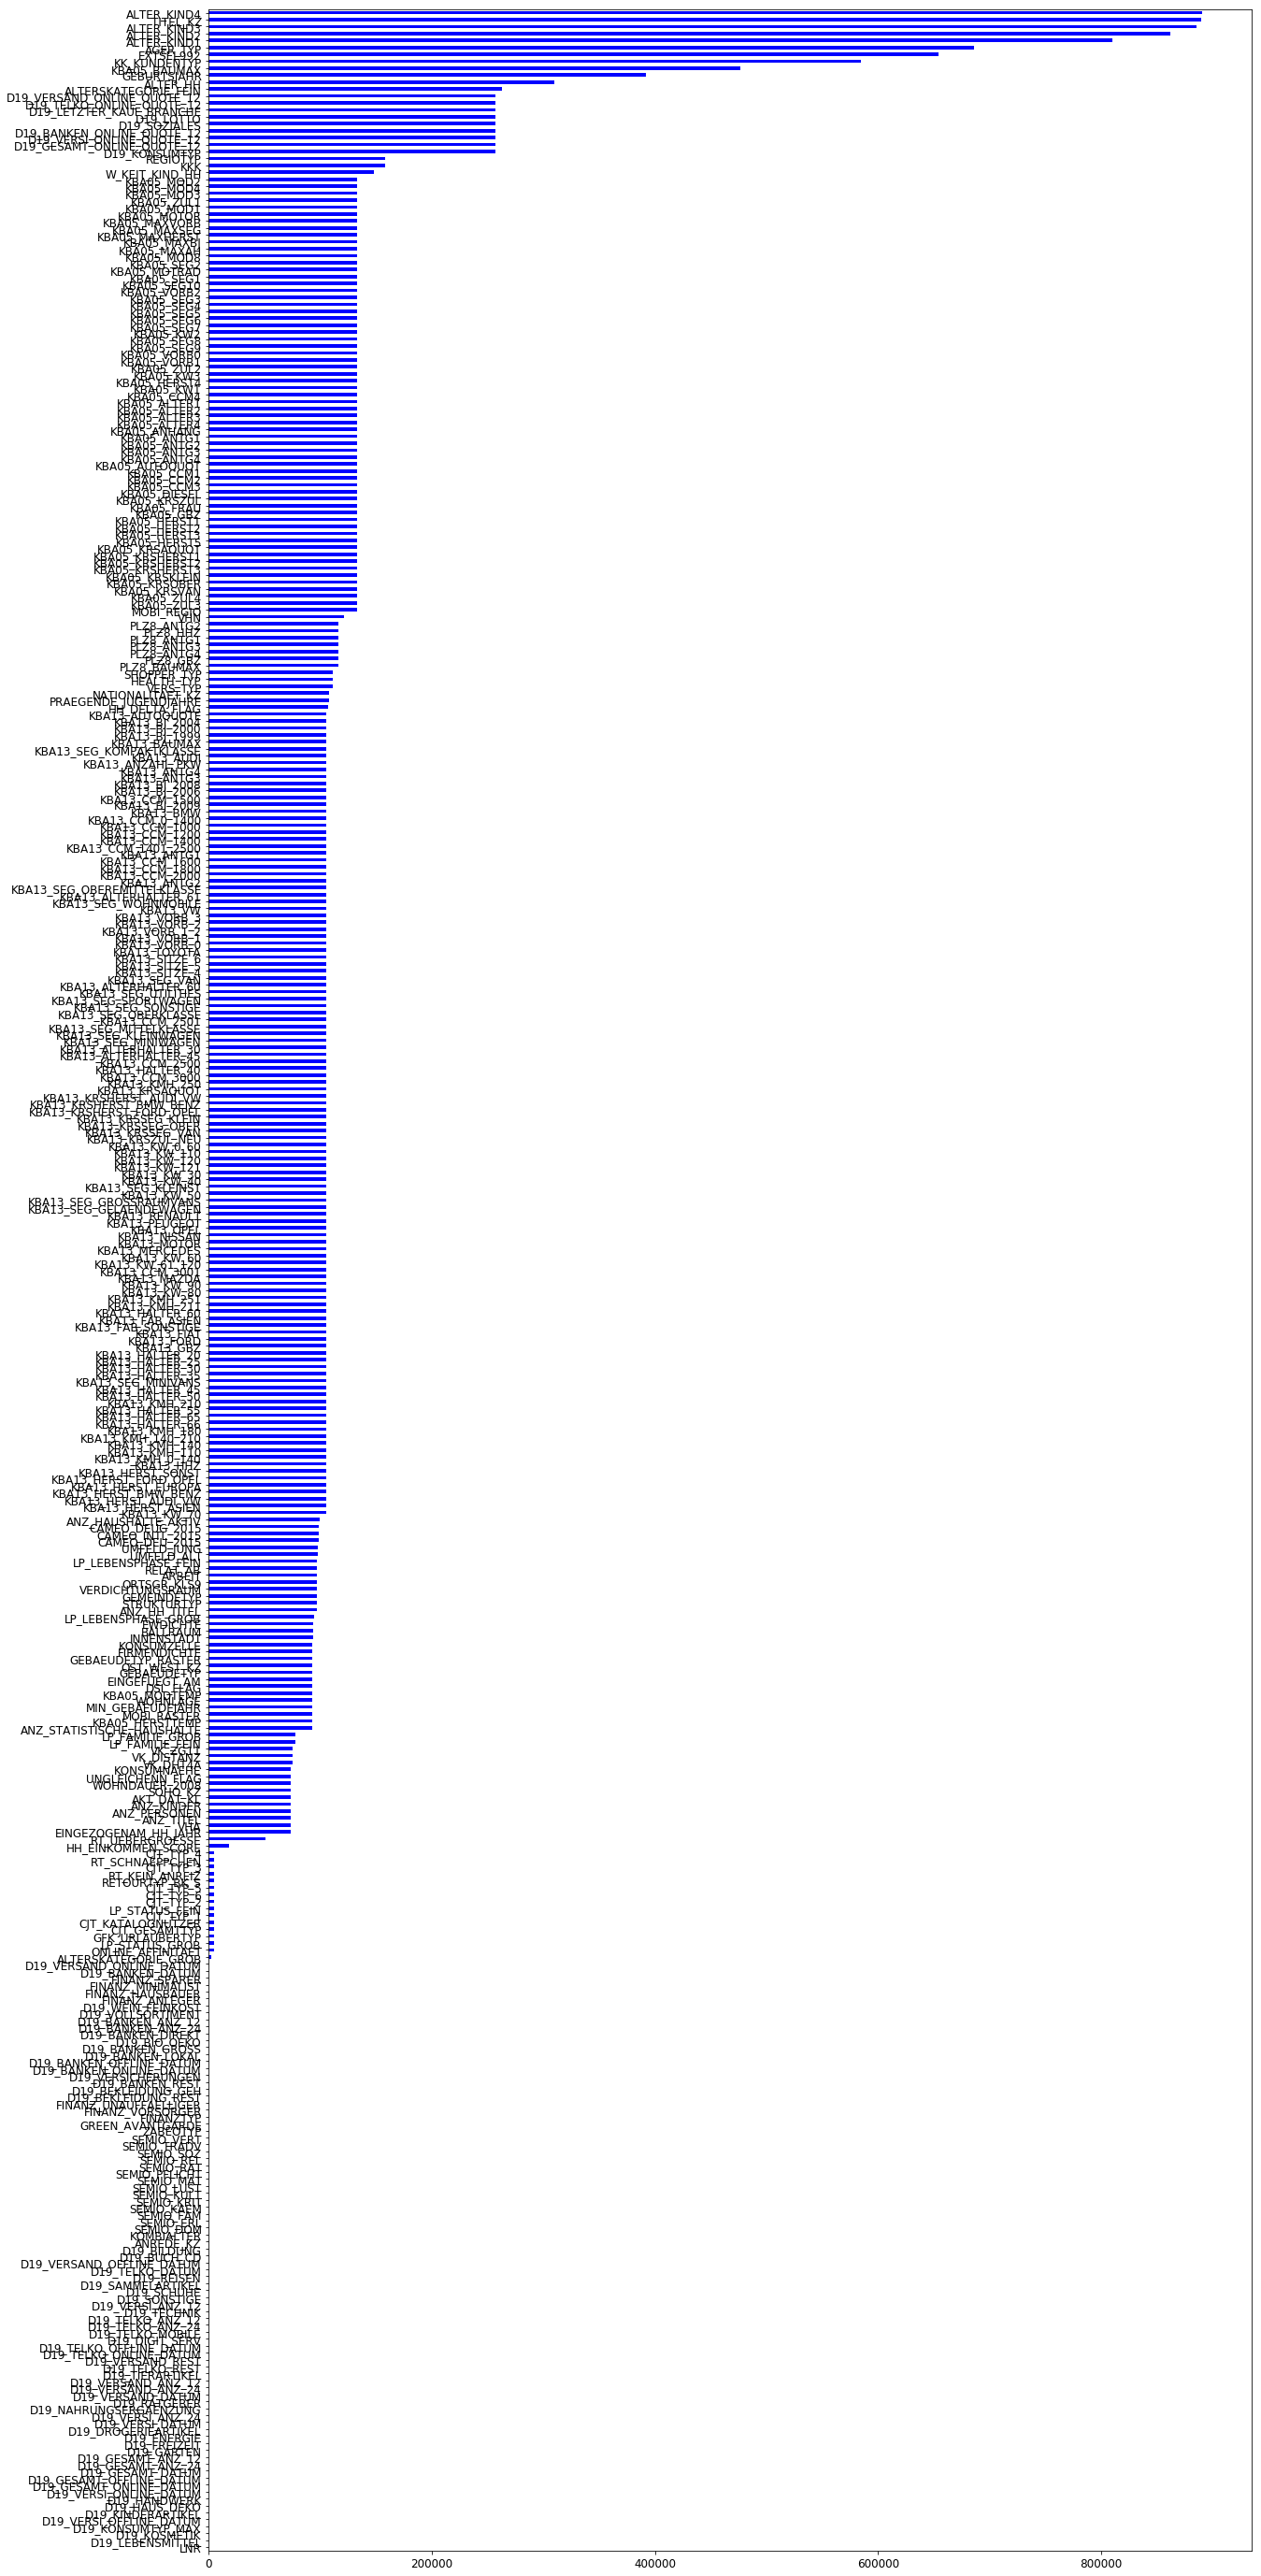

In [27]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
azdias.isnull().sum().sort_values().plot.barh(figsize=(20,50),fontsize=12,color='blue');

## Remove outlier columns based on patterns of missing data in columns

In [28]:
# Investigate patterns in the amount of missing data in each column.
nan_val = azdias.isnull().sum()
# percent of nan values
nan_val_percent = 100 * azdias.isnull().sum() / len(azdias)

# table with the results
nan_val_table = pd.concat([nan_val, nan_val_percent], axis=1)
        
# column head
nan_val_table_ren_columns = nan_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
# Sort the table in descending order
nan_val_table_ren_columns = nan_val_table_ren_columns[
            nan_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
nan_val_table_ren_columns

,Missing Values,% of Total Values
ALTER_KIND4,890016,99.9
TITEL_KZ,889061,99.8
ALTER_KIND3,885051,99.3
ALTER_KIND2,861722,96.7
ALTER_KIND1,810163,90.9
AGER_TYP,685843,77.0
EXTSEL992,654153,73.4
KK_KUNDENTYP,584612,65.6
KBA05_BAUMAX,476524,53.5
GEBURTSJAHR,392318,44.0


In [29]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
nan_columns = list(nan_val_table_ren_columns[nan_val_table_ren_columns['% of Total Values'] > 50].index)
print(nan_columns)
print('%d columns removed.' % len(nan_columns))
azdias_backup = azdias
azdias1 = azdias_backup.drop(nan_columns, axis=1)#, 'ALTER_KIND3', 'ALTER_KIND2', 'ALTER_KIND1', 'EXTSEL992', 'KK_KUNDENTYP'])
azdias1.shape

['ALTER_KIND4', 'TITEL_KZ', 'ALTER_KIND3', 'ALTER_KIND2', 'ALTER_KIND1', 'AGER_TYP', 'EXTSEL992', 'KK_KUNDENTYP', 'KBA05_BAUMAX']
9 columns removed.


(891221, 357)

In [30]:
# Remove the outlier attributes from `feat_info`
feat_info_new = feat_info[feat_info.index.isin(nan_columns) == False]
feat_info_new.shape

(357, 3)

## Assess missing data in each row and use rows with lesser missing data

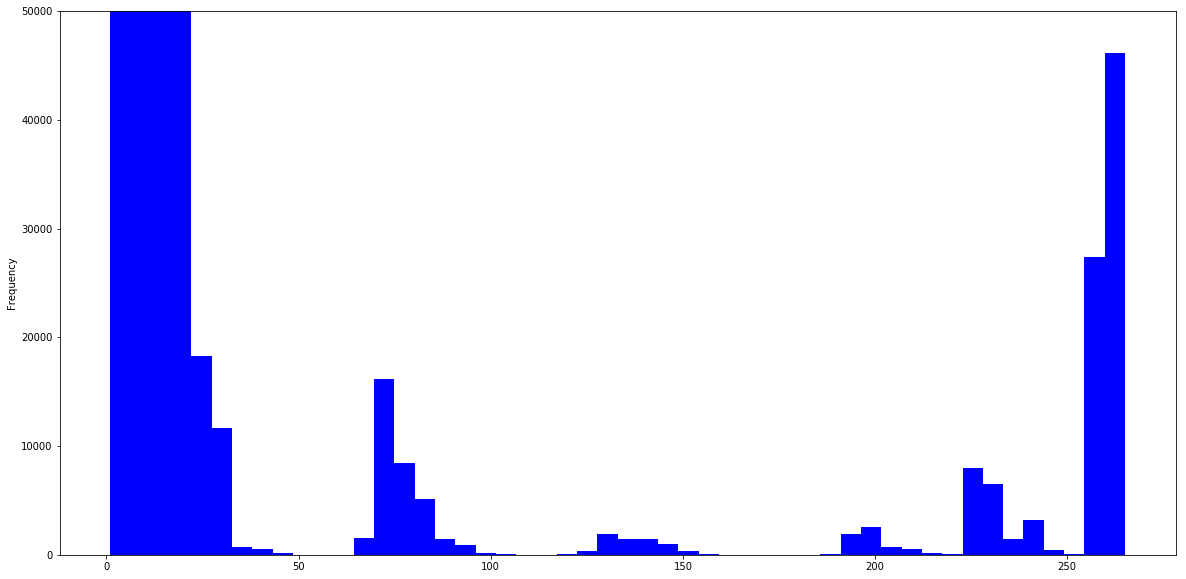

In [31]:
# Group number of missing values for histogram
count_missing_row_data = azdias.isnull().sum(axis=1)
count_missing_row_data.value_counts().sort_index()
count_missing_row_data.plot(kind='hist',bins=50,figsize=(20,10),color='blue', ylim=(0,50000));

In [32]:
s1 = list(count_missing_row_data[count_missing_row_data <= 5].index)
azdias_subset_1 = azdias[azdias.index.isin(s1)]
azdias_subset_1.shape

(36870, 366)

In [33]:
azdias_1 = azdias_subset_1
azdias_1.shape

(36870, 366)

In [34]:
# How many features are there of each data type?
print("There are {} columns which have missing data type.".format(feat_info_new['type'].isnull().sum()))
feat_info_new['type'].value_counts()

There are 276 columns which have missing data type.


ordinal        49
categorical    18
numeric         7
mixed           6
interval        1
Name: type, dtype: int64

## Re-Encode Features

In [35]:
# How many features are there of each data type?
azdias_categorical = feat_info_new[feat_info_new['type']=='categorical']
azdias_ordinal = feat_info_new[feat_info_new['type']=='ordinal']
azdias_mixed = feat_info_new[feat_info_new['type']=='mixed']
azdias_numeric = feat_info_new[feat_info_new['type']=='numeric']
azdias_interval = feat_info_new[feat_info_new['type']=='interval']

print("len(azdias_categorical): ",len(azdias_categorical))
print("len(azdias_ordinal): ",len(azdias_ordinal))
print("len(azdias_mixed): ",len(azdias_mixed))
print("len(azdias_numeric): ",len(azdias_numeric))
print("len(azdias_interval): ",len(azdias_interval))

len(azdias_categorical):  18
len(azdias_ordinal):  49
len(azdias_mixed):  6
len(azdias_numeric):  7
len(azdias_interval):  1


### Re-Encode Categorical Features

In [36]:
# Re-encode categorical variable(s) to be kept in the analysis.
azdias_categorical_list =[]
for i in range(0,len(azdias_categorical)):
    azdias_categorical_list.append(azdias_categorical.iloc[i,:].name)
    
azdias_categorical_list

['ANREDE_KZ',
 'CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'GREEN_AVANTGARDE',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'SOHO_KZ',
 'VERS_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'OST_WEST_KZ',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015']

In [37]:
#Check if the categorical variables are binary or multi-level
binary_categorical = []
multilevel_categorical = []
for att in azdias_categorical_list:
    if len(azdias_1[att].value_counts()) == 2:
        binary_categorical.append(att)
    else:
        multilevel_categorical.append(att)
print("Binary Categorical Variables: ",binary_categorical)
print("Multi-level Categorical Variables: ",multilevel_categorical)

Binary Categorical Variables:  ['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']
Multi-level Categorical Variables:  ['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']


In [38]:
# Change 'OST_WEST_KZ to numerical values
azdias_1['OST_WEST_KZ'] = azdias_1['OST_WEST_KZ'].map({'W': 1, 'O': 0})

/home/kuhelee/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [39]:
#Drop following columns
#'CJT_GESAMTTYP',FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015'
columns_dropped = ['LP_FAMILIE_GROB', 'LP_STATUS_GROB','CAMEO_DEU_2015']
azdias_1 = azdias_1.drop(columns_dropped,axis=1)
azdias_1.shape

(36870, 363)

In [40]:
#One-hot encoding for multilevel_categorical columns
one_hot_encoded_columns = []

for i in multilevel_categorical:
    if i not in columns_dropped:
        one_hot_encoded_columns.append(i)
        
one_hot_encoded_columns

['CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'LP_FAMILIE_FEIN',
 'LP_STATUS_FEIN',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'CAMEO_DEUG_2015']

In [41]:
azdias_1 = pd.get_dummies(azdias_1, columns = one_hot_encoded_columns, prefix=one_hot_encoded_columns)

In [42]:
# Engineer Mixed-Type Features
azdias_mixed

,information_level,type,missing_or_unknown
attribute,,,
LP_LEBENSPHASE_FEIN,person,mixed,[0]
LP_LEBENSPHASE_GROB,person,mixed,[0]
PRAEGENDE_JUGENDJAHRE,person,mixed,"[-1, 0]"
WOHNLAGE,building,mixed,[-1]
CAMEO_INTL_2015,microcell_rr4,mixed,"[-1, XX]"
PLZ8_BAUMAX,macrocell_plz8,mixed,"[-1, 0]"


In [43]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
azdias_1['PRAEGENDE_JUGENDJAHRE'].value_counts()

14.0    5315
5.0     5212
8.0     3845
6.0     3698
3.0     3163
4.0     2801
11.0    2742
9.0     2724
10.0    2653
15.0    2242
1.0      678
2.0      611
12.0     494
7.0      440
13.0     252
Name: PRAEGENDE_JUGENDJAHRE, dtype: int64

In [44]:
#New Column Decade based on decade of birth
decade_youth = []

for i in azdias_1['PRAEGENDE_JUGENDJAHRE']:
    if i in [1,2,3,4]:
        decade_youth.append(1) 
    elif i in [5,6,7,8,9]:
        decade_youth.append(2) 
    else:
        decade_youth.append(3)
d = pd.Series(decade_youth)
azdias_1['DECADE_YOUTH'] = d.values
azdias_1['DECADE_YOUTH'].value_counts().sort_index()

1     7253
2    15919
3    13698
Name: DECADE_YOUTH, dtype: int64

In [45]:
#Drop PRAEGENDE_JUGENDJAHRE from dataframe
azdias_1 = azdias_1.drop('PRAEGENDE_JUGENDJAHRE',axis=1)

In [46]:
# Investigate "CAMEO_INTL_2015" 
azdias_1['CAMEO_INTL_2015'].value_counts()

24      2937
14      2745
24.0    2248
14.0    2078
51      1557
41      1509
25      1443
22      1384
43      1352
41.0    1181
51.0    1138
25.0    1058
15      1056
13      1054
23      1024
22.0    1024
43.0     995
54       858
13.0     808
23.0     772
15.0     760
45       668
54.0     620
45.0     549
34       482
12       479
52       427
55       407
31       383
12.0     347
34.0     344
44       341
33       340
32       321
52.0     313
55.0     305
35       296
44.0     287
33.0     264
31.0     264
32.0     227
35.0     225
Name: CAMEO_INTL_2015, dtype: int64

In [47]:
# Engineer a feature based on household wealth
cameo_households = []

for i in azdias_1['CAMEO_INTL_2015']:
    if 10 < float(i) < 16:
        cameo_households.append(5)
    elif 20 < float(i) < 26:
        cameo_households.append(4)
    elif 30 < float(i) < 36:
        cameo_households.append(3)
    elif 40 < float(i) < 46:
        cameo_households.append(2)
    else:
        cameo_households.append(1)
ch = pd.Series(cameo_households)
azdias_1['CAMEO_HOUSEHOLDS'] = ch.values
azdias_1['CAMEO_HOUSEHOLDS'].value_counts().sort_index()

1     5625
2     6882
3     3146
4    11890
5     9327
Name: CAMEO_HOUSEHOLDS, dtype: int64

In [48]:
azdias_1 = azdias_1.drop(['CAMEO_INTL_2015'],axis=1)

In [49]:
azdias_1 = azdias_1.drop(['LP_LEBENSPHASE_FEIN','LP_LEBENSPHASE_GROB','MIN_GEBAEUDEJAHR','PLZ8_BAUMAX'],axis=1)

In [50]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    for column in df:
        if column == 'RESPONSE':
            pass
        else:
            mask = df[column].isin(feat_info.loc[column, 'missing_or_unknown'])
            df.loc[mask, column] = np.NaN          
        
    # remove selected columns and rows, ...
    col_outlier = ['AGER_TYP',
                   'ALTER_HH',
                   'ALTER_KIND1',
                   'ALTER_KIND2',
                   'ALTER_KIND3',
                   'ALTER_KIND4',
                   'EXTSEL992',
                   'GEBURTSJAHR',
                   'TITEL_KZ',
                   'KK_KUNDENTYP',
                   'KBA05_BAUMAX']
    df_sub = df.drop(col_outlier, axis=1)
    
    # drop additional columns
    df_sub = df_sub.drop(['LNR', 'EINGEFUEGT_AM', 'VERDICHTUNGSRAUM'], axis=1)
    
    # select, re-encode, and engineer column values.
    df_sub['OST_WEST_KZ'] = df_sub['OST_WEST_KZ'].replace({'O':1.0, 'W':2.0})
    
    # change to float for the other three datasets
    df_sub['CAMEO_DEUG_2015'] = df_sub['CAMEO_DEUG_2015'].astype('float')
    
    categorical = ['CJT_GESAMTTYP',
                   'FINANZTYP',
                   'GFK_URLAUBERTYP',
                   'LP_FAMILIE_FEIN',
                   'LP_FAMILIE_GROB',
                   'LP_STATUS_FEIN',
                   'LP_STATUS_GROB',
                   'NATIONALITAET_KZ',
                   'SHOPPER_TYP',
                   'ZABEOTYP',
                   'GEBAEUDETYP',
                   'CAMEO_DEUG_2015',
                   'CAMEO_DEU_2015',
                   'D19_KONSUMTYP',
                   'ALTERSKATEGORIE_FEIN',
                   'D19_LETZTER_KAUF_BRANCHE',
                   'EINGEZOGENAM_HH_JAHR',
                   'GEMEINDETYP',
                   'STRUKTURTYP',              
                   'LP_LEBENSPHASE_GROB', 
                   'WOHNLAGE']
    
    df_enc = pd.get_dummies(df_sub, columns=categorical)
    
    # Engineer mixed-type features
    df_enc['DECADE'] = df_enc['PRAEGENDE_JUGENDJAHRE']
    main = df_enc['PRAEGENDE_JUGENDJAHRE'].isin([1.0, 3.0, 5.0, 8.0, 10.0, 12.0, 14.0])
    df_enc.loc[main, 'MOVEMENT'] = 1.0
    avant = df_enc['PRAEGENDE_JUGENDJAHRE'].isin([2.0, 4.0, 6.0, 7.0, 9.0, 11.0, 13.0, 15.0])
    df_enc.loc[avant, 'MOVEMENT'] = 2.0
    
    if df_enc['CAMEO_INTL_2015'].dtype == 'float64':
        df_enc['WEALTH'] = df_enc['CAMEO_INTL_2015'] // 10
        df_enc['LIFE_STAGE'] = df_enc['CAMEO_INTL_2015'] % 10
    else:
        df_enc['WEALTH'] = df_enc['CAMEO_INTL_2015'].str[0].astype('float')
        df_enc['LIFE_STAGE'] = df_enc['CAMEO_INTL_2015'].str[1].astype('float')
    
    df_clean = df_enc.drop(['PRAEGENDE_JUGENDJAHRE', 'CAMEO_INTL_2015', 'LP_LEBENSPHASE_FEIN'], axis=1)

    # Return the cleaned dataframe.
    return df_clean

#### Discussion 1.2.1: Re-Encode Categorical Features

To start with the count of each type of features viz, __categorical, ordinal, mixed, numeric, interval__ is assessed.
The categorical features are further analysed to whether they falls under the category of binary or multivalued.
len(azdias_categorical):  18
len(azdias_ordinal):  49
len(azdias_mixed):  6
len(azdias_numeric):  7
len(azdias_interval):  1

The multi categorical variables have been analysed individually.
The features __'CJT_GESAMTTYP', 'FINANZTYP', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP'__,all related to person-level features so the decision was to keep them and one hot encode them.

__'GFK_URLAUBERTYP'__ provides information on the vacation habits of an individual which in turn reflects an attribute pertaining to an indiviual. Hence it is considered to be a reliable feature to be included for further analysis. 

Since "LP_FAMILIE_GROB" and  "LP_STATUS_GROB' summarizes the column "LP_FAMILIE_FEIN",and "LP_STATUS_FEIN" respectively, it has been decided to discard the columns "LP_FAMILIE_GROB" and  "LP_STATUS_GROB' as it would lead to redundant information.

Compared to "CAMEO_DEUG_2015", "CAMEO_DEU_2015", provides a much detailed information about the wealth status of an individual which is not of much relevance for customer segmentation, hence keeping the rough scale should suffice. 

In [51]:
azdias_1.shape

(36870, 428)

## Feature Transformation

In [52]:
from sklearn.preprocessing import Imputer, StandardScaler

In [53]:
azdias_1.to_csv('azdias_preprocesed_1.csv',sep=';',encoding='utf-8',index=False)
azdias_2 = pd.read_csv('azdias_preprocesed_1.csv',sep=';')
column_header_list = list(azdias_2.columns.values)

dataframe_imputer = Imputer(missing_values='NaN',strategy='most_frequent',axis=0)
azdias_impute = dataframe_imputer.fit_transform(azdias_2._get_numeric_data())
scaler = StandardScaler()
azdias_scaled = scaler.fit_transform(azdias_impute)

## Dimensionality Reduction

In [54]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [55]:
n_components = int(azdias_impute.shape[1] / 2) # Half the number of features

pca = PCA(n_components)
azdias_pca = pca.fit_transform(azdias_scaled)

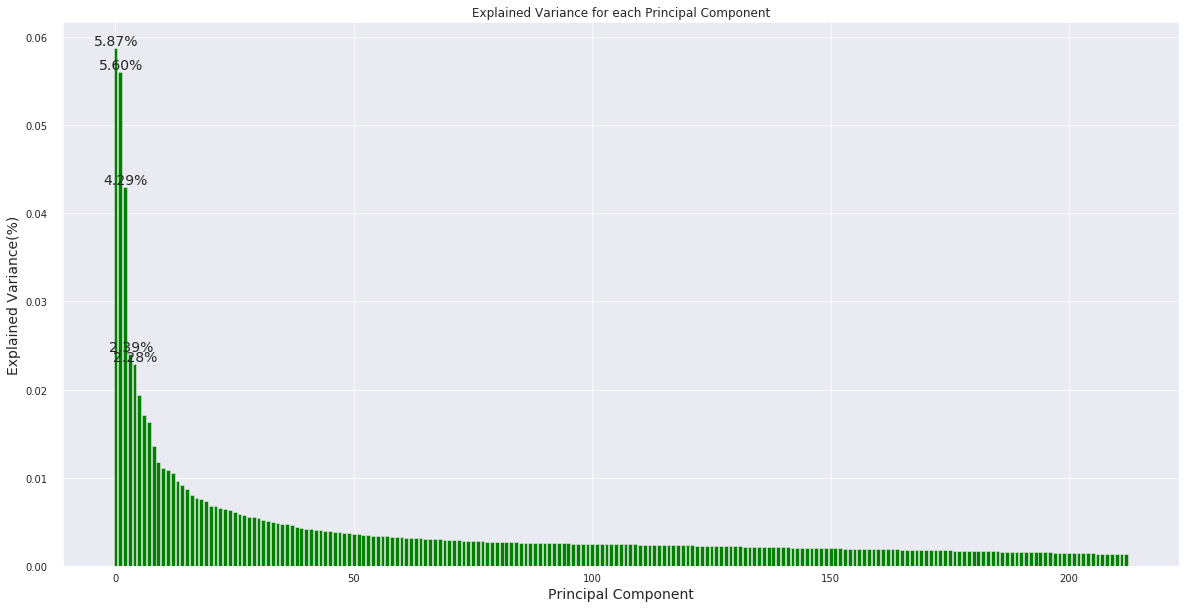

In [56]:
# Investigate the variance accounted for by each principal component.

sns.set_style("darkgrid")
n_components = len(pca.explained_variance_ratio_)
nc = np.arange(n_components)
val_explained_var_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(20,10))
ax = plt.subplot(111)
plt.style.use("ggplot")

cumvals = np.cumsum(val_explained_var_ratio)
ax.bar(nc, val_explained_var_ratio,color='green')
for i in range(0,nc[5]):
    ax.annotate(r"%s%%" % ((str(val_explained_var_ratio[i]*100)[:4])), (nc[i]+0.2,val_explained_var_ratio[i]), va='bottom',ha='center',fontsize=14)

ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=1,length=12)

ax.set_xlabel("Principal Component",fontsize=14)
ax.set_ylabel("Explained Variance(%)",fontsize=14)
plt.title("Explained Variance for each Principal Component",fontsize=12)

plt.show()

Text(0.5,1,'Explained Cumulative Variance for Principal Component')

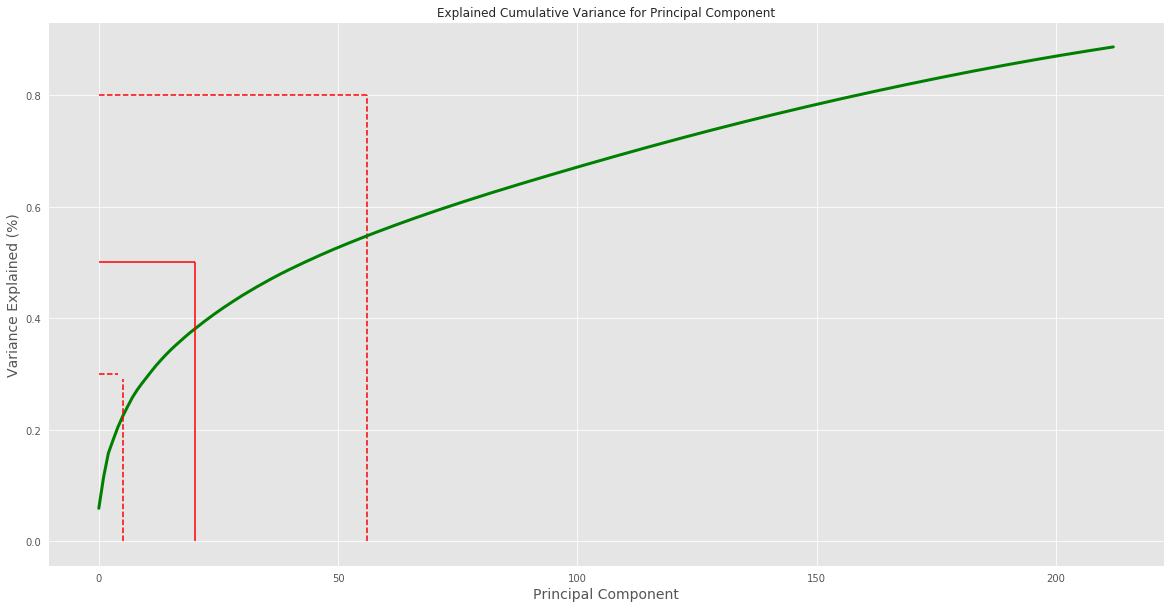

In [57]:
n_components = len(pca.explained_variance_ratio_)
nc = np.arange(n_components)
val_explained_var_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(20,10))
ax = plt.subplot(111)
cum_val_explained_var_ratio = np.cumsum(val_explained_var_ratio)

ax.plot(nc, cum_val_explained_var_ratio,color='green',linewidth=3)
plt.hlines(y=0.8, xmin=0, xmax=56, color='red', linestyles='dashed',zorder=1)
plt.vlines(x=56, ymin=0, ymax=0.8, color='red', linestyles='dashed',zorder=2)
plt.hlines(y=0.3, xmin=0, xmax=4, color='red', linestyles='dashed',zorder=3)
plt.vlines(x=5, ymin=0, ymax=0.29, color='red', linestyles='dashed',zorder=4)
plt.hlines(y=0.5, xmin=0, xmax=20, color='red', linestyles='-',zorder=5)
plt.vlines(x=20, ymin=0, ymax=0.5, color='red', linestyles='-',zorder=6)

ax.set_xlabel("Principal Component",fontsize=14)
ax.set_ylabel("Variance Explained (%)",fontsize=14)
plt.title("Explained Cumulative Variance for Principal Component",fontsize=12)

### Keeping around 15 to 20 principal components would suffice to generate around 50% variance.

In [287]:
components.iloc[0].sort_values(ascending=False)

D19_KONSUMTYP_MAX             0.0028
KOMBIALTER                    0.0023
D19_GESAMT_DATUM              0.0020
SEMIO_REL                     0.0017
D19_VERSAND_DATUM             0.0017
D19_GESAMT_ONLINE_DATUM       0.0015
FINANZ_ANLEGER                0.0015
FINANZ_UNAUFFAELLIGER         0.0014
SEMIO_KRIT                    0.0014
D19_VERSAND_ONLINE_DATUM      0.0013
CJT_TYP_1                     0.0012
CJT_TYP_2                     0.0012
FINANZ_SPARER                 0.0011
SEMIO_KAEM                    0.0011
SEMIO_PFLICHT                 0.0009
SEMIO_FAM                     0.0009
SEMIO_DOM                     0.0009
D19_GESAMT_OFFLINE_DATUM      0.0009
D19_VERSAND_OFFLINE_DATUM     0.0008
RT_KEIN_ANREIZ                0.0008
SEMIO_MAT                     0.0007
CJT_KATALOGNUTZER             0.0005
SEMIO_RAT                     0.0005
D19_VERSI_DATUM               0.0005
FINANZTYP_4.0                 0.0004
CJT_GESAMTTYP_6.0             0.0004
LP_STATUS_FEIN_5.0            0.0004
D

In [288]:
components.iloc[1].sort_values(ascending=False)

KBA13_ANZAHL_PKW              0.9380
KBA13_GBZ                     0.0018
KBA13_HHZ                     0.0017
PLZ8_GBZ                      0.0017
PLZ8_HHZ                      0.0016
KBA13_CCM_3001                0.0010
KOMBIALTER                    0.0009
D19_KONSUMTYP_MAX             0.0009
KBA13_KMH_140                 0.0007
SEMIO_REL                     0.0007
FINANZ_ANLEGER                0.0006
FINANZ_UNAUFFAELLIGER         0.0006
KBA13_CCM_1500                0.0006
D19_GESAMT_DATUM              0.0005
KBA13_AUTOQUOTE               0.0005
KBA13_KW_120                  0.0004
CJT_TYP_1                     0.0004
KBA13_KMH_0_140               0.0004
SEMIO_FAM                     0.0004
KBA13_ALTERHALTER_60          0.0003
KBA13_MOTOR                   0.0003
KBA13_KMH_251                 0.0003
KBA13_KMH_110                 0.0003
KBA13_HALTER_50               0.0003
KBA13_HALTER_55               0.0003
D19_VERSAND_DATUM             0.0003
KBA13_KW_30                   0.0003
F

In [289]:
components.iloc[2].sort_values(ascending=False)

ANZ_HAUSHALTE_AKTIV            0.7039
ANZ_STATISTISCHE_HAUSHALTE     0.6976
HH_EINKOMMEN_SCORE             0.0261
VK_DHT4A                       0.0226
FINANZ_HAUSBAUER               0.0222
D19_GESAMT_ONLINE_DATUM        0.0207
ORTSGR_KLS9                    0.0204
D19_GESAMT_DATUM               0.0201
D19_VERSAND_DATUM              0.0188
D19_VERSAND_ONLINE_DATUM       0.0188
VK_DISTANZ                     0.0178
ANZ_HH_TITEL                   0.0177
KBA13_BAUMAX                   0.0171
PLZ8_BAUMAX                    0.0163
WEALTH                         0.0153
EWDICHTE                       0.0152
AKT_DAT_KL                     0.0123
KBA05_ANTG4                    0.0119
VK_ZG11                        0.0110
KBA13_ANTG3                    0.0099
PLZ8_ANTG3                     0.0096
SEMIO_KAEM                     0.0095
KBA13_ANTG4                    0.0095
PLZ8_ANTG4                     0.0092
W_KEIT_KIND_HH                 0.0090
SEMIO_KRIT                     0.0088
CJT_KATALOGN

In [58]:
# Re-apply PCA to the data while selecting for number of components to retain.
print(val_explained_var_ratio)
print(np.sum(val_explained_var_ratio.tolist()))

[0.05874354 0.0560251  0.04299858 0.02398232 0.02287407 0.01940872
 0.01709459 0.01629663 0.01361814 0.0117558  0.0111389  0.01086638
 0.01056399 0.00965538 0.00914686 0.00867167 0.00808455 0.00773208
 0.00755015 0.00736522 0.00680207 0.00676394 0.00661307 0.00641739
 0.00630855 0.00608116 0.00592416 0.0057672  0.00558916 0.00556575
 0.00541306 0.00515536 0.00512517 0.00497378 0.00481891 0.00478967
 0.00471831 0.0046285  0.00442836 0.00433282 0.00421386 0.00415858
 0.00407298 0.0040398  0.00396718 0.00391915 0.00385164 0.00380836
 0.00376598 0.00368313 0.00360819 0.0035701  0.00350659 0.00348738
 0.00341126 0.00340157 0.0033711  0.00334115 0.00327003 0.00323831
 0.00321461 0.00319225 0.00318903 0.00313125 0.00310639 0.00308381
 0.00302861 0.00300213 0.00299708 0.00295918 0.00294823 0.0029025
 0.0028732  0.00286374 0.0028522  0.00280777 0.00279621 0.00277112
 0.00275572 0.00274404 0.00272572 0.00271724 0.0027095  0.00265985
 0.00264844 0.00263585 0.00262091 0.00261503 0.00260679 0.00259

In [59]:
# Over a number of different cluster counts...
scores = []
centers = list(range(1,15))
for center in centers:
    
    # run k-means clustering on the data and...
    kmeans = KMeans(n_clusters=center, random_state=10)
    model = kmeans.fit(azdias_pca)
    
    # compute the average within-cluster distances.
    score = np.abs(model.score(azdias_pca))
    scores.append(score)

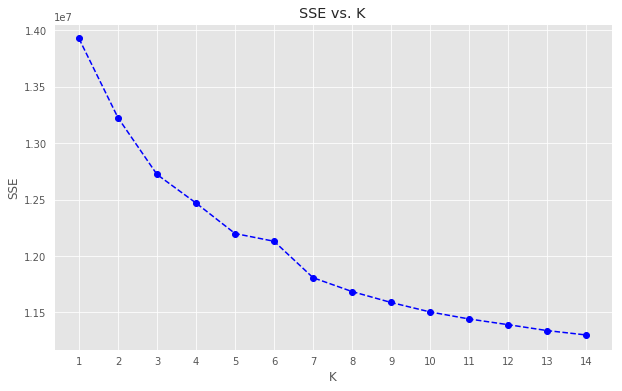

In [60]:


# Investigate the change in within-cluster distance across number of clusters.

plt.figure(figsize=(10, 6))
ax = plt.subplot()
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.xticks(np.arange(1, 15, step=1))
plt.ylabel('SSE');
plt.title('SSE vs. K');



#### Considering the huge amount of data, it would be useful not to have similarity of samples between two clusters. Since 15 clusters would also provide quite a less amount of SSE, it would be a good choice

In [66]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans = KMeans(n_clusters=15, random_state=10, n_jobs=-1)
azdias_preds = kmeans.fit_predict(azdias_pca)

In [63]:
customers = pd.read_csv('customers.csv', sep=';')
customers = customers.drop(customers.columns[[0]], axis=1)
customers.shape

/home/kuhelee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(191652, 369)

In [92]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
customers.shape
customers_1 = customers.drop(['CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP'], axis=1)
print(customers_1.shape)
customers_1.head()


customers_preprocessed = clean_data(customers_1)
print(customers_preprocessed.shape)
#customer_column_list = list(customers_preprocessed.columns.values)
#print(customer_column_list)

(191652, 366)
(191652, 589)


In [97]:


# Check for missing column in `customers_clean`
missing = list(np.setdiff1d(azdias_1.columns, customers_preprocessed.columns))
missing



['AGER_TYP',
 'ALTERSKATEGORIE_FEIN',
 'ALTER_HH',
 'ALTER_KIND1',
 'ALTER_KIND2',
 'ALTER_KIND3',
 'ALTER_KIND4',
 'CAMEO_DEUG_2015_1',
 'CAMEO_DEUG_2015_2',
 'CAMEO_DEUG_2015_3',
 'CAMEO_DEUG_2015_4',
 'CAMEO_DEUG_2015_5',
 'CAMEO_DEUG_2015_6',
 'CAMEO_DEUG_2015_7',
 'CAMEO_DEUG_2015_8',
 'CAMEO_DEUG_2015_9',
 'CAMEO_HOUSEHOLDS',
 'D19_KONSUMTYP',
 'D19_LETZTER_KAUF_BRANCHE',
 'DECADE_YOUTH',
 'EINGEFUEGT_AM',
 'EINGEZOGENAM_HH_JAHR',
 'EXTSEL992',
 'GEBURTSJAHR',
 'GEMEINDETYP',
 'KBA05_BAUMAX',
 'KK_KUNDENTYP',
 'LNR',
 'STRUKTURTYP',
 'TITEL_KZ',
 'VERDICHTUNGSRAUM',
 'WOHNLAGE']

In [94]:
customers_preprocessed = pd.DataFrame(customers_preprocessed.fillna(0))
#customers_impute = dataframe_imputer.transform(customers_preprocessed._get_numeric_data())
#customers_scaled = scaler.transform(customers_preprocessed)
customers_pca = pca.fit_transform(customers_preprocessed._get_numeric_data())

In [98]:
for m in missing:
    customers_preprocessed[m] = 0
    customers_preprocessed[m] = customers_preprocessed[m].astype('uint8')
    
print(customers_preprocessed.shape)

(191652, 621)


In [111]:
customers_preprocessed = pd.DataFrame(customers_preprocessed.fillna(0))
#customers_impute = dataframe_imputer.transform(customers_preprocessed._get_numeric_data())
#customers_scaled = scaler.transform(customers_preprocessed)
#._get_numeric_data()
customers_pca = pca.fit_transform(customers_preprocessed)

In [132]:
dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

# PCA components
components = pd.DataFrame(np.round(pca.components_, 4), columns = customers_preprocessed.keys())
components.index = dimensions

In [113]:
#customers_impute = dataframe_imputer.transform(pd.DataFrame(customers_preprocessed))
#customers_scaled = scaler.transform(pd.DataFrame(customers_preprocessed))
#customers_pca = pca.transform(customers_preprocessed.dropna())
customers_preds = kmeans.fit_predict(customers_pca)


### Compare azdias and demographic data

In [84]:
# Obtain missing row data for customer dataset
missing_row_data_customers = customers.isnull().sum(axis=1)
customer_rows_deleted = customers[customers.index.isin(missing_row_data_customers[missing_row_data_customers > 5].index)]
customer_rows_deleted.shape

(85531, 369)

In [114]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.
#Counts in customer segment
azdias_preds = pd.Series(azdias_preds)
azdias_preds_counts = azdias_preds.value_counts().sort_index()
azdias_preds_counts = pd.Series(azdias_preds_counts)
print("azdias_preds_counts")
print(azdias_preds_counts)

# Counts in each population segment
customer_preds = pd.Series(customers_preds)
customer_preds_counts = customer_preds.value_counts().sort_index()
customer_preds_counts = pd.Series(customer_preds_counts)
print("customer_preds_counts")
print(customer_preds_counts)

# Create a dataframe from population and customer segments
compare_cluster_counts =[]
compare_cluster_counts = pd.concat([azdias_preds_counts, customer_preds_counts], axis=1).reset_index()
compare_cluster_counts.columns = ['cluster','azdias','customer']
compare_cluster_counts

azdias_preds_counts
0     3502
1     1530
2     2720
3     2328
4      142
5     3501
6     2892
7     1525
8     2400
9     3536
10    2938
11    2748
12    3825
13    1651
14    1632
dtype: int64
customer_preds_counts
0     14876
1     49927
2      5790
3     15190
4       846
5      2659
6     10523
7     17388
8      8567
9     19225
10     8399
11     2249
12    18619
13     4207
14    13187
dtype: int64


,cluster,azdias,customer
0,0,3502,14876
1,1,1530,49927
2,2,2720,5790
3,3,2328,15190
4,4,142,846
5,5,3501,2659
6,6,2892,10523
7,7,1525,17388
8,8,2400,8567
9,9,3536,19225


    cluster  azdias  customer  pop_ratio%  cust_ratio%   diff
0         0    3502     14876        9.50         7.76  -1.74
1         1    1530     49927        4.15        26.05  21.90
2         2    2720      5790        7.38         3.02  -4.36
3         3    2328     15190        6.31         7.93   1.62
4         4     142       846        0.39         0.44   0.05
5         5    3501      2659        9.50         1.39  -8.11
6         6    2892     10523        7.84         5.49  -2.35
7         7    1525     17388        4.14         9.07   4.93
8         8    2400      8567        6.51         4.47  -2.04
9         9    3536     19225        9.59        10.03   0.44
10       10    2938      8399        7.97         4.38  -3.59
11       11    2748      2249        7.45         1.17  -6.28
12       12    3825     18619       10.37         9.72  -0.65
13       13    1651      4207        4.48         2.20  -2.28
14       14    1632     13187        4.43         6.88   2.45


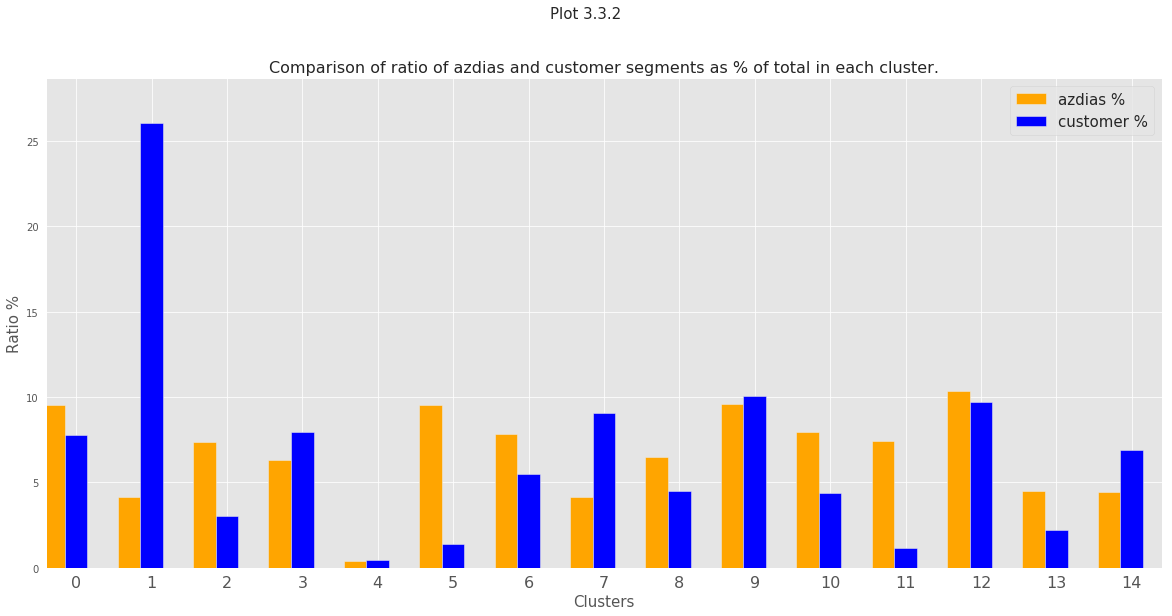

In [123]:
# What kinds of people are part of a cluster that is overrepresented and underrepresentedin the
# customer data compared to the general population?

compare_cluster_counts['pop_ratio%'] = (compare_cluster_counts['azdias']/compare_cluster_counts['azdias'].sum()*100).round(2)
compare_cluster_counts['cust_ratio%'] = (compare_cluster_counts['customer']/compare_cluster_counts['customer'].sum()*100).round(2)
compare_cluster_counts['diff'] = compare_cluster_counts['cust_ratio%'] - compare_cluster_counts['pop_ratio%']
print(compare_cluster_counts)
# Visualize ratios

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)

ax = compare_cluster_counts['pop_ratio%'].plot(x=compare_cluster_counts['cluster'], kind='bar',color='orange',width=-0.3, align='edge',position=0)
ax = compare_cluster_counts['cust_ratio%'].plot(kind='bar',color='blue',width = 0.3, align='edge',position=1)

ax.margins(x=0.5,y=0.1)
ax.set_xlabel('Clusters', fontsize=15) 
ax.set_ylabel('Ratio %', fontsize=15)
ax.xaxis.set(ticklabels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax.tick_params(axis = 'x', which = 'major', labelsize = 16)
plt.xticks(rotation=360,)

plt.legend(('azdias %', 'customer %'),fontsize=15)
plt.title(('Comparison of ratio of azdias and customer segments as % of total in each cluster.')
          ,fontsize=16)

plt.subplots_adjust(bottom=0.2)
plt.suptitle("Plot 3.3.2", fontsize=15)
plt.show()



In [121]:
# Missing rows from azdias
count_missing_row_data = azdias.isnull().sum(axis=1)
count_missing_row_data.value_counts().sort_index()
#count_missing_row_data.plot(kind='hist',bins=50,figsize=(20,10),color='blue', ylim=(0,50000));

s2_azdias = list(count_missing_row_data[count_missing_row_data > 5].index)
azdias_subset_2 = azdias[azdias.index.isin(s2_azdias)]
azdias_subset_2.shape[0]

count_missing_row_data = customers_1.isnull().sum(axis=1)
count_missing_row_data.value_counts().sort_index()
#count_missing_row_data.plot(kind='hist',bins=50,figsize=(20,10),color='blue', ylim=(0,50000));

s2_customer = list(count_missing_row_data[count_missing_row_data > 5].index)
customer_subset_2 = customers_1[customers_1.index.isin(s2_customer)]
customer_subset_2.shape[0]

print("Number of rows with missing data from azdias dataset: ",azdias_subset_2.shape[0])
print("Number of rows with missing data from customer dataset: ",customer_subset_2.shape[0])

Number of rows with missing data from azdias dataset:  854351
Number of rows with missing data from customer dataset:  170916


In [124]:
cc0 = kmeans.cluster_centers_[1]
cc0 = pd.Series(cc0)
cc0.index = cc0.index +1
cc0.sort_values(ascending=False)

1      1552.248504
2        52.287962
4         0.004403
16        0.003097
8         0.001818
9         0.001561
10        0.001456
32        0.001323
49        0.001313
14        0.001158
34        0.000999
15        0.000943
31        0.000802
26        0.000625
19        0.000547
60        0.000452
17        0.000441
39        0.000376
80        0.000330
29        0.000318
12        0.000308
42        0.000301
43        0.000296
61        0.000287
92        0.000277
18        0.000262
116       0.000250
100       0.000245
102       0.000242
27        0.000239
          ...     
79       -0.000156
176      -0.000158
13       -0.000168
44       -0.000173
63       -0.000177
22       -0.000181
117      -0.000184
95       -0.000191
108      -0.000191
36       -0.000207
85       -0.000226
51       -0.000234
55       -0.000238
41       -0.000239
54       -0.000242
20       -0.000291
52       -0.000293
58       -0.000309
73       -0.000322
30       -0.000343
35       -0.000383
71       -0.

In [133]:
components.iloc[0].sort_values(ascending=False)

D19_KONSUMTYP_MAX             0.0028
KOMBIALTER                    0.0023
D19_GESAMT_DATUM              0.0020
SEMIO_REL                     0.0017
D19_VERSAND_DATUM             0.0017
D19_GESAMT_ONLINE_DATUM       0.0015
FINANZ_ANLEGER                0.0015
FINANZ_UNAUFFAELLIGER         0.0014
SEMIO_KRIT                    0.0014
D19_VERSAND_ONLINE_DATUM      0.0013
CJT_TYP_1                     0.0012
CJT_TYP_2                     0.0012
FINANZ_SPARER                 0.0011
SEMIO_KAEM                    0.0011
SEMIO_PFLICHT                 0.0009
SEMIO_FAM                     0.0009
SEMIO_DOM                     0.0009
D19_GESAMT_OFFLINE_DATUM      0.0009
D19_VERSAND_OFFLINE_DATUM     0.0008
RT_KEIN_ANREIZ                0.0008
SEMIO_MAT                     0.0007
CJT_KATALOGNUTZER             0.0005
SEMIO_RAT                     0.0005
D19_VERSI_DATUM               0.0005
FINANZTYP_4.0                 0.0004
CJT_GESAMTTYP_6.0             0.0004
LP_STATUS_FEIN_5.0            0.0004
D

# Discussion

The ratio differences for customer data and population data is visualized which shows that the customer dataset is over-represented in cluster 1,3 and 7 and under-represented in the remaining clusters. On observing the 1st principal component : features with positive weights include D19_KONSUMTYP_MAX (consumption_type),D19_GESAMT_DATUM and D19_VERSAND_DATUM and 19_GESAMT_ONLINE_DATUM(indicating frequency of activity in the last 12 months), FINANZ_ANLEGER   and FINANZ_UNAUFFAELLIGER (indicating the financial topology).  
Features with negative weights include ORTSGR_KLS9(size of the comunity), WOHNDAUER_2008 (length of residence over the past one year)

Number of rows with missing data from azdias dataset:  854351
Number of rows with missing data from customer dataset:  1709

## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [261]:
mailout_train = pd.read_csv('Udacity_MAILOUT_052018_TRAIN.csv', sep=';')
mailout_train.head()

/home/kuhelee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0,1763,2,1.0,8.0,NaN,NaN,NaN,NaN,8.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1,1771,1,4.0,13.0,NaN,NaN,NaN,NaN,13.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,2,1776,1,1.0,9.0,NaN,NaN,NaN,NaN,7.0,...,6.0,4.0,2.0,NaN,9.0,2.0,3,0,1,4
3,3,1460,2,1.0,6.0,NaN,NaN,NaN,NaN,6.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,4,1783,2,1.0,9.0,NaN,NaN,NaN,NaN,9.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


In [262]:
mailout_train = mailout_train.drop(mailout_train.columns[[0]], axis=1)
mailout_train.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1763,2,1.0,8.0,NaN,NaN,NaN,NaN,8.0,15.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1771,1,4.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,1776,1,1.0,9.0,NaN,NaN,NaN,NaN,7.0,0.0,...,6.0,4.0,2.0,NaN,9.0,2.0,3,0,1,4
3,1460,2,1.0,6.0,NaN,NaN,NaN,NaN,6.0,4.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,1783,2,1.0,9.0,NaN,NaN,NaN,NaN,9.0,53.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


In [140]:
# Total number of records
n_records = mailout_train.shape[0]

# Number of records where the individual became a customer
n_customer = mailout_train[mailout_train['RESPONSE'] == 1].shape[0]

# Number of records where individual did not become a customer
n_not_customer = mailout_train[mailout_train['RESPONSE'] == 0].shape[0]

# Percentage of individuals who became customers
customer_perc = (n_customer / n_records) * 100

# Print the results
print("Number of records: {}".format(n_records))
print("Number of customers: {}".format(n_customer))
print("Number of non-customers: {}".format(n_not_customer))
print("Percentage of customers: {}%".format(customer_perc))

Number of records: 42962
Number of customers: 532
Number of non-customers: 42430
Percentage of customers: 1.2383036171500394%


In [141]:
mailout_train_clean = clean_data(mailout_train)
mailout_train_clean.head()

,AKT_DAT_KL,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CJT_KATALOGNUTZER,...,WOHNLAGE_2.0,WOHNLAGE_3.0,WOHNLAGE_4.0,WOHNLAGE_5.0,WOHNLAGE_7.0,WOHNLAGE_8.0,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
0,1.0,15.0,0.0,0.0,1.0,13.0,0.0,3.0,5.0,5.0,...,0,1,0,0,0,0,1.0,1.0,NaN,NaN
1,4.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,5.0,2.0,...,0,0,0,0,1,0,8.0,1.0,NaN,NaN
2,1.0,NaN,NaN,0.0,0.0,1.0,0.0,4.0,1.0,5.0,...,1,0,0,0,0,0,2.0,2.0,NaN,NaN
3,1.0,4.0,0.0,0.0,2.0,4.0,0.0,4.0,2.0,5.0,...,0,0,0,0,0,0,2.0,2.0,NaN,NaN
4,1.0,53.0,0.0,0.0,1.0,44.0,0.0,3.0,4.0,5.0,...,0,1,0,0,0,0,3.0,1.0,NaN,NaN


In [142]:
# Split the data into features and target label
response_raw = mailout_train_clean['RESPONSE']
features_raw = mailout_train_clean.drop('RESPONSE', axis = 1)

In [154]:
# Import StratifiedKFold
from sklearn.model_selection import StratifiedKFold

# Initialize 5 stratified folds
skf = StratifiedKFold(n_splits=5, random_state=28)
skf.get_n_splits(features_raw, response_raw)
print(skf)

StratifiedKFold(n_splits=5, random_state=28, shuffle=False)


### Based on the the following points Adaboost has been chosen for the further analysis

Strengths:

    is a Boosting type Ensemble Learning Method.
    Less prone to overfitting.
    It starts by assigning weight to each observation. If prediction is incorrect using the first learner, then it is assigned higher weight. Iteratively, this method adds learner(s) until a limit in the number of models or accuracy is reached.
    Does not require lot of parameters to be initialized.

Weaknesses:

    noisy data and outliers in the data can affect the performance.
    Usage of a complex model as base learner can lead to overfitting.
    Training can be time-consuming.

Candidacy for the problem:

    Data used for the problem is quite clean thereby making the iterative training quick and making overall accuracy better on unseen testing data.
    Slow training would not have much impact as the model needs to be run periodically rather than in real-time.


In [155]:
from sklearn.metrics import roc_auc_score

model_scores = {}
clf_A = AdaBoostClassifier(random_state=40)
clf_B = RandomForestClassifier(random_state=40)
clf_C = SVC(random_state=40)

for i, clf in enumerate([clf_A]):

    # Create machine learning pipeline
    pipeline = Pipeline([
        ('imp', dataframe_imputer),
        ('scale', scaler),
        ('clf', clf)
    ])

    scores = []
    j = 0

    # Perform 5-fold validation
    for train_index, test_index in skf.split(features_raw, response_raw):
        j+=1
        print('Classifier {}: Fold {}...'.format(i+1, j))
        
        # Split the data into training and test sets
        X_train, X_test = features_raw.iloc[train_index], features_raw.iloc[test_index]
        y_train, y_test = response_raw.iloc[train_index], response_raw.iloc[test_index]

        # Train using the pipeline
        pipeline.fit(X_train, y_train)

        #Predict on the test data
        y_pred = pipeline.predict(X_test)

        score = roc_auc_score(y_test, y_pred)
        scores.append(score)
        print(score)

    model_scores[clf] = scores

Classifier 1: Fold 1...
0.49988215884987036
Classifier 1: Fold 2...
0.5
Classifier 1: Fold 3...
0.5
Classifier 1: Fold 4...
0.5
Classifier 1: Fold 5...
0.5


## Explanation of the algorithm used

AdaBoost stands for adaptive boosting which is used as a classifier algorithm. Usually Boosting is a term used for a general method for improving the performance of a single learning algorithm. One way to achieve this is by combining multiple weak classifiers into a strong classifier.

Why we need to combine multiple algorithms? For example, if we consider height as the only deciding factor for classfying an individual as male or female, this would lead to lot of misclassification but might reach an accuracy of about 50%. This is an example of unit-depth decision tree where decision is governed by a single feature. Such unit-depth decision tree is called decision stump.

Curse of dimensionality in decision tree: Continuing with the previous example, we start with height as a deciding factor. On realizing that height would not suffice to classify well, we add region as another descriptor and so on. This in turn increases the dimensionality of the classification model. This is referred as curse of dimensionality.

One way to deal with such situation is to prune the decision tree to reduce the number of decision-making factors. A better way would be to use ensemble method that combines decision stumps by focusing on samples that are hard to classify. Adaboost is based on such an ensemble method.

To summarize, a full-fledged feature set used as a classfier cannot run in real-time, hence the need of a simple learning algorithm. But an algorithm too simple would not lead to the desired accuracy, hence termed as weak learners. Thus, a weak learner is simply a classifier that has a poor performance but little better than random guessing. Adaboost algorithm boosts the performance of such weak learners by cascading them to create one strong learner.

Why is the boosting adaptive? Each weak classifier is trained on a subset of the total training set. Starting with a set a weak learners with similar weight for all the training examples, once we know the misclassified observations, additional weight is given to these observations. This forces the weak learners to focus on those hard examples in the subsequent round. This process is repeated iteratively to combine all decision stumps in order to get the final strong learner using weak learners. As evident from this process the boosting algorithm adapats itself to changing scenario, hence the term adaptive boosting.

Two main things that adaboost does: 1.Choose the training set for each new classifierbased on results of the previous classifier. 2.Determines the weight to be given to the predicted answer for each classifier while combining the results from the classifiers.

Predicting donors for CharityML using Adaboost starts by picking a learner and training the same learner on the samples of data repeatedly. In each iteration the people that were misclassified are given higher wights for the next iteration so that the learner focuses more on those observations. At the final step the classification model is obtained by the average of the learners with their respective weights.

[1] https://rayli.net/blog/data/top-10-data-mining-algorithms-in-plain-english/ [2] https://prateekvjoshi.com/2014/05/05/what-is-adaboost/ [3]http://mccormickml.com/2013/12/13/adaboost-tutorial/


## Part 3: Kaggle Competition

Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter. If you're one of the top performers, you may have the chance to be contacted by a hiring manager from Arvato or Bertelsmann for an interview!

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [277]:
mailout_test = pd.read_csv('Udacity_MAILOUT_052018_TEST.csv', sep=';')

/home/kuhelee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [278]:
del mailout_test['Unnamed: 0']
mailout_test.shape

(42833, 366)

In [279]:
mailout_test.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1754,2,1.0,7.0,NaN,NaN,NaN,NaN,6.0,2.0,...,4.0,5.0,6.0,3.0,6.0,9.0,3.0,3,1,4
1,1770,-1,1.0,0.0,NaN,NaN,NaN,NaN,0.0,20.0,...,1.0,5.0,2.0,1.0,6.0,9.0,5.0,3,1,4
2,1465,2,9.0,16.0,NaN,NaN,NaN,NaN,11.0,2.0,...,3.0,9.0,6.0,3.0,2.0,9.0,4.0,3,2,4
3,1470,-1,7.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,...,2.0,6.0,6.0,3.0,NaN,9.0,2.0,3,2,4
4,1478,1,1.0,21.0,NaN,NaN,NaN,NaN,13.0,1.0,...,1.0,2.0,4.0,3.0,3.0,9.0,7.0,4,2,4


In [280]:
#clf = clf_A.fit(features_raw, response_raw)
print(features_raw.shape[1])
mailout_test_clean = clean_data(mailout_test)
print(mailout_test.shape[1])
missing = list(np.setdiff1d(features_raw.columns, mailout_test_clean.columns))
missing

589
366


['EINGEZOGENAM_HH_JAHR_1986.0']

In [281]:
for m in missing:
    mailout_test_clean[m] = 0
    mailout_test_clean[m] = mailout_test_clean[m].astype('uint8')
mailout_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42833 entries, 0 to 42832
Columns: 589 entries, AKT_DAT_KL to EINGEZOGENAM_HH_JAHR_1986.0
dtypes: float64(332), uint8(257)
memory usage: 119.0 MB


In [282]:
pipeline.fit(features_raw, response_raw)
predictions = pipeline.predict(mailout_test_clean)

In [283]:
submission = pd.DataFrame(index=mailout_test['LNR'].astype('int32'), data=predictions)

In [284]:
submission.rename(columns={0: "RESPONSE"}, inplace=True)
submission.head()

,RESPONSE
LNR,
1754,0
1770,0
1465,0
1470,0
1478,0


In [285]:
submission.to_csv('kaggle_submission.csv')